In [18]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [4]:
bank=pd.read_csv(r"C:\Users\SUMAN\Desktop\ASSIGNMENT- EXCELR\bank-full.csv",delimiter=';')
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
# One-Hot Encoding of categrical variables
data1 = pd.get_dummies(bank,columns=['job','marital','education','contact','poutcome','month'])
data1

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,no,2143,yes,no,5,261,1,-1,0,...,False,False,False,False,False,False,True,False,False,False
1,44,no,29,yes,no,5,151,1,-1,0,...,False,False,False,False,False,False,True,False,False,False
2,33,no,2,yes,yes,5,76,1,-1,0,...,False,False,False,False,False,False,True,False,False,False
3,47,no,1506,yes,no,5,92,1,-1,0,...,False,False,False,False,False,False,True,False,False,False
4,33,no,1,no,no,5,198,1,-1,0,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,17,977,3,-1,0,...,False,False,False,False,False,False,False,True,False,False
45207,71,no,1729,no,no,17,456,2,-1,0,...,False,False,False,False,False,False,False,True,False,False
45208,72,no,5715,no,no,17,1127,5,184,3,...,False,False,False,False,False,False,False,True,False,False
45209,57,no,668,no,no,17,508,4,-1,0,...,False,False,False,False,False,False,False,True,False,False


In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  45211 non-null  int64 
 1   default              45211 non-null  object
 2   balance              45211 non-null  int64 
 3   housing              45211 non-null  object
 4   loan                 45211 non-null  object
 5   day                  45211 non-null  int64 
 6   duration             45211 non-null  int64 
 7   campaign             45211 non-null  int64 
 8   pdays                45211 non-null  int64 
 9   previous             45211 non-null  int64 
 10  y                    45211 non-null  object
 11  job_admin.           45211 non-null  bool  
 12  job_blue-collar      45211 non-null  bool  
 13  job_entrepreneur     45211 non-null  bool  
 14  job_housemaid        45211 non-null  bool  
 15  job_management       45211 non-null  bool  
 16  job_

## converting str values into integers

In [8]:
data1['default'] = np.where(data1['default'].str.contains("yes"),1,0)
data1['housing'] = np.where(data1['housing'].str.contains("yes"),1,0)
data1['loan'] = np.where(data1['loan'].str.contains("yes"),1,0)
data1['y'] = np.where(data1['y'].str.contains("yes"),1,0)
data1

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,0,2143,1,0,5,261,1,-1,0,...,False,False,False,False,False,False,True,False,False,False
1,44,0,29,1,0,5,151,1,-1,0,...,False,False,False,False,False,False,True,False,False,False
2,33,0,2,1,1,5,76,1,-1,0,...,False,False,False,False,False,False,True,False,False,False
3,47,0,1506,1,0,5,92,1,-1,0,...,False,False,False,False,False,False,True,False,False,False
4,33,0,1,0,0,5,198,1,-1,0,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,...,False,False,False,False,False,False,False,True,False,False
45207,71,0,1729,0,0,17,456,2,-1,0,...,False,False,False,False,False,False,False,True,False,False
45208,72,0,5715,0,0,17,1127,5,184,3,...,False,False,False,False,False,False,False,True,False,False
45209,57,0,668,0,0,17,508,4,-1,0,...,False,False,False,False,False,False,False,True,False,False


In [10]:
#Dividing the input and output values
x = pd.concat([data1.iloc[:,0:10],data1.iloc[:,11:]],axis=1)
y = data1.iloc[:,10]

In [11]:
x

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,0,2143,1,0,5,261,1,-1,0,...,False,False,False,False,False,False,True,False,False,False
1,44,0,29,1,0,5,151,1,-1,0,...,False,False,False,False,False,False,True,False,False,False
2,33,0,2,1,1,5,76,1,-1,0,...,False,False,False,False,False,False,True,False,False,False
3,47,0,1506,1,0,5,92,1,-1,0,...,False,False,False,False,False,False,True,False,False,False
4,33,0,1,0,0,5,198,1,-1,0,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,...,False,False,False,False,False,False,False,True,False,False
45207,71,0,1729,0,0,17,456,2,-1,0,...,False,False,False,False,False,False,False,True,False,False
45208,72,0,5715,0,0,17,1127,5,184,3,...,False,False,False,False,False,False,False,True,False,False
45209,57,0,668,0,0,17,508,4,-1,0,...,False,False,False,False,False,False,False,True,False,False


In [12]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int32

In [22]:
import warnings
warnings.filterwarnings("ignore")

In [23]:
#logistic regression model
classifier  = LogisticRegression()
classifier.fit(x,y)

LogisticRegression()

## model prediction

In [24]:
y_pred = classifier.predict(x)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [25]:
y_pred_df = pd.DataFrame({'actual_y':y,'y_pred_prob':y_pred})
y_pred_df

,actual_y,y_pred_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


## Testing model accuracy

In [26]:
#confusion matrix for testing accuracy
confusion_matrix = confusion_matrix(y,y_pred)
confusion_matrix

array([[39161,   761],
       [ 4131,  1158]], dtype=int64)

In [27]:
# The model accuracy is calculated by (a+d)/(a+b+c+d)
(39161+1158)/(39161+761+4131+1158)

0.8917962442768352

In [29]:
# As accuracy = 0.8917, which is greater than 0.5; Thus [:,1] Threshold value>0.5=1 else [:,0] Threshold value<0.5=0 
classifier.predict_proba(x)[:,1]

array([0.04337685, 0.02435194, 0.01809817, ..., 0.65988071, 0.07701884,
       0.11119456])

auc accuracy 0.5999414044567849


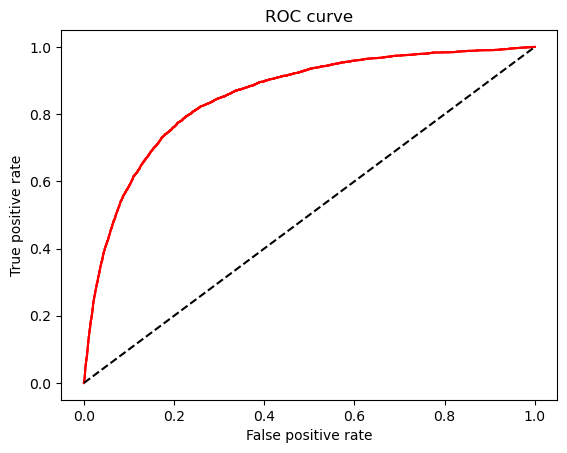

In [39]:
# ROC curve plotting and finding AUC value
fpr,tpr,thresolds = roc_curve(y,classifier.predict_proba(x)[:,1])
plt.plot(fpr,tpr,color='red')
auc = roc_auc_score(y,y_pred)

plt.plot(fpr,tpr,color = 'red',label='logit label(area = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve")
plt.show
print("auc accuracy",auc)